In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from nilearn import plotting
import ptitprince as pt
import nibabel as nb
import seaborn as sns

plt.rcParams["pdf.fonttype"]=42  #export as editable text
plt.rcParams["ps.fonttype"]=42
plt.rcParams["svg.fonttype"]="none" #export as editable text

/data/u_ajohn_software/anaconda3/envs/thalamus_AJ/lib/python3.7/site-packages/nilearn/datasets/__init__.py:96: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


## Decoding: Thomas atlas


In [22]:
# create color map as in thomas paper
from matplotlib.colors import ListedColormap
#color= ["steelblue","none", "firebrick","darkgreen", "orange","mediumpurple", "magenta", "none", "tan", "cyan", "lime","salmon","yellow"]
color= ["#0072B2","#FFFFFF","#A60628", "#009E73","#D55E00", "#9A76F3", "#CD0074", "#FFFFFF", "#D0B53B", "#33CCCC", "#8EEB00", "#FF7373", "#FFED2D"]
cmap= ListedColormap(color)


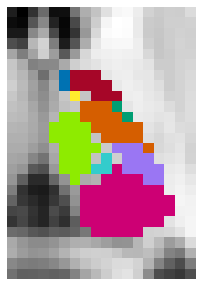

In [23]:
#mni background
mni=nb.load("/afs/.cbs.mpg.de/software/.fsl/6.0.3/debian-bullseye-amd64/data/standard/MNI152_T1_2mm.nii.gz").get_fdata()
slice_mni= mni[42:60,42:68,39]

#thomas atlas in 2mm
epi_img_data=nb.load("/data/p_02666/Project1_thalamus/Atlas/THOMAS_download_from_zenodo/res_to_2mm/thomas_left_2mm.nii.gz").get_fdata()
epi_img_data=epi_img_data.astype('float')
epi_img_data[np.where(epi_img_data==0)] = np.NaN
#select slice
slice_= epi_img_data[42:60,42:68,39]

#plot
fig, ax = plt.subplots(1, figsize=((4,5)))
cax=plt.imshow(slice_mni.T, cmap="gray", origin="lower")
cax=plt.imshow(slice_.T, cmap=cmap, origin="lower")
plt.axis("off")
#cbar = fig.colorbar(cax, orientation='vertical')
plt.savefig("/data/p_02666/Project1_thalamus/plots/figure1/thomas_atlas_left_2mm.pdf", transparent=True, format='pdf', dpi=600)


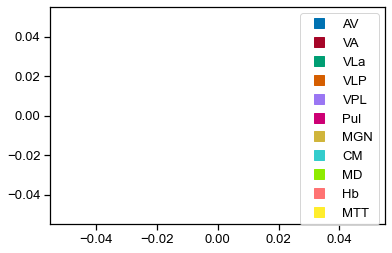

In [24]:
color= ["#0072B2","#A60628", "#009E73","#D55E00", "#9A76F3", "#CD0074", "#D0B53B", "#33CCCC", "#8EEB00", "#FF7373", "#FFED2D"]
labels=["AV","VA","VLa","VLP","VPL","Pul","MGN","CM","MD","Hb","MTT"]
for label, col in zip(labels, color):
    plt.plot([], [], label=label, color=col, marker="s",linestyle="", markersize=10)  # Create empty plot with marker# Create the legend
plt.legend()# Display the legend
plt.savefig("/data/p_02666/Project1_thalamus/plots/figure1/legend.pdf", transparent=True, format='pdf', dpi=600)


## Decoding: Thomas atlas

In [25]:
#load gradients and input structural connectivity matrix
gradients = np.load("/data/p_02666/Project1_thalamus/structural_connectivity/parcels_200/gradients_lh.npy")
gradient1=gradients[:,0]
gradient2=gradients[:,1]
gradient3=gradients[:,2]
thomas_matrix= nb.load("/data/p_02666/Project1_thalamus/Atlas/THOMAS_download_from_zenodo/res_to_2mm/thomas_left_2mm.nii.gz").get_fdata()

# import refined thalamus mask as reference
thala_ref_lh_path="/data/p_02666/mica-mics/thalamus_space_mni/space-MNI125_atlas-thalamus_lh_refined.nii.gz"
thala_ref_lh=nb.load(thala_ref_lh_path).get_fdata()
# collect indices of voxels where mask = 1 
idx_l=np.where(thala_ref_lh==1)
thomas=thomas_matrix[idx_l]         # value of thomas matrix
thomas[thomas==0]=np.nan            # if zero set to nan (mask are not completly fitting, take the intersection)

len(idx_l[0])

1068

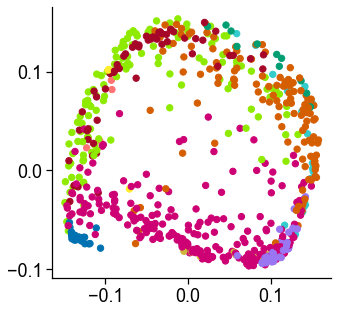

In [87]:
#color= ["steelblue","none", "firebrick","darkgreen", "orange","mediumpurple", "magenta", "none", "tan", "cyan", "lime","salmon","yellow"]
plt.rcParams["font.family"]="Arial"
fig, ax=plt.subplots(1, figsize=(5,5))
fig = sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.5, 'font.family':'Arial'})
fig = plt.scatter(gradient1, gradient2, c=thomas, cmap=cmap, alpha=1,s=40)
#ax.set_xlabel("gradient 1", fontsize = 22, fontname="Arial", labelpad=8)
#ax.set_ylabel("gradient 2", fontsize = 22, fontname="Arial", labelpad=8)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yticks((-0.1,0,0.1))
ax.set_xticks((-0.1,0,0.1))
ax.tick_params(labelsize=18)
plt.savefig("/data/p_02666/Project1_thalamus/plots/figure1/Decodingframe_thomas_left.pdf", transparent=True, format='pdf', dpi=600)


# plot distribution

In [88]:
#load gradients and input structural connectivity matrix
gradients = np.load("/data/p_02666/Project1_thalamus/structural_connectivity/parcels_200/gradients_lh.npy")
gradient1=gradients[:,0]
thomas_matrix= nb.load("/data/p_02666/Project1_thalamus/Atlas/THOMAS_download_from_zenodo/res_to_2mm/thomas_left_2mm.nii.gz").get_fdata()

#import refined thalamus mask as reference
thala_ref_lh_path="/data/p_02666/mica-mics/thalamus_space_mni/space-MNI125_atlas-thalamus_lh_refined.nii.gz"
thala_ref_lh=nb.load(thala_ref_lh_path).get_fdata()

#collect indices of voxels where mask = 1 
idx_l=np.where(thala_ref_lh==1)
thomas=thomas_matrix[idx_l]        # value of thomas matrix
thomas[thomas==0]=np.nan           # if zero set to nan (mask are not completly fitting, take the intersection)

In [89]:
# create dataframe
df=pd.DataFrame(columns=["gradient1_loadings","gradient2_loadings","label_nr"])
df["gradient1_loadings"]=gradient1
df["gradient2_loadings"]=gradient2
df["label_nr"]=thomas

label_mapping={
    2:"AV",
    4:"VA",
    5:"VLa",
    6:"VLP",
    7:"VPL",
    8:"Pul",
    10:"MGN",
    11:"CM",
    12:"MD",
    13:"Hb",
    14:"MTT"   }

df["labels"]=df["label_nr"].map(label_mapping)
df

,gradient1_loadings,gradient2_loadings,label_nr,labels
0,-0.122754,0.022808,13.0,Hb
1,-0.121973,0.057882,NaN,NaN
2,-0.123259,0.021347,NaN,NaN
3,-0.120697,0.055700,NaN,NaN
4,-0.128238,0.047583,12.0,MD
...,...,...,...,...
1063,-0.069266,-0.045157,8.0,Pul
1064,-0.057227,-0.047421,8.0,Pul
1065,-0.062120,-0.055406,NaN,NaN
1066,-0.038428,-0.063016,NaN,NaN


In [90]:
#colors
color= ["#0072B2","#A60628", "#009E73","#D55E00", "#9A76F3", "#CD0074", "#D0B53B", "#33CCCC", "#8EEB00", "#FF7373", "#FFED2D"]
labels=["AV","VA","VLa","VLP","VPL","Pul","MGN","CM","MD","Hb","MTT"]
label_to_color=dict(zip(labels,color))
label_to_color

{'AV': '#0072B2',
 'VA': '#A60628',
 'VLa': '#009E73',
 'VLP': '#D55E00',
 'VPL': '#9A76F3',
 'Pul': '#CD0074',
 'MGN': '#D0B53B',
 'CM': '#33CCCC',
 'MD': '#8EEB00',
 'Hb': '#FF7373',
 'MTT': '#FFED2D'}

## Gradient 1

In [91]:
#rank according to median
#calculate median per subnucleus
median_loadings=df.groupby("labels")["gradient1_loadings"].median()

#sort
sorted_labels=median_loadings.sort_values().index
sorted_labels   # -> create index based on this order

Index(['AV', 'MTT', 'Hb', 'MD', 'VA', 'Pul', 'MGN', 'VLa', 'VPL', 'VLP', 'CM'], dtype='object', name='labels')

In [92]:
sorted_colors=[label_to_color[label] for label in sorted_labels]
sorted_colors

['#0072B2',
 '#FFED2D',
 '#FF7373',
 '#8EEB00',
 '#A60628',
 '#CD0074',
 '#D0B53B',
 '#009E73',
 '#9A76F3',
 '#D55E00',
 '#33CCCC']

In [93]:
df.loc[df["labels"]=="AV" , "index_g1"]=0
df.loc[df["labels"]=="MTT" ,"index_g1"]=1
df.loc[df["labels"]=="Hb",  "index_g1"]=2
df.loc[df["labels"]=="MD" , "index_g1"]=3
df.loc[df["labels"]=="VA" , "index_g1"]=4
df.loc[df["labels"]=="Pul", "index_g1"]=5
df.loc[df["labels"]=="MGN", "index_g1"]=6
df.loc[df["labels"]=="VLa", "index_g1"]=7
df.loc[df["labels"]=="VPL", "index_g1"]=8
df.loc[df["labels"]=="VLP", "index_g1"]=9
df.loc[df["labels"]=="CM" , "index_g1"]=10
df

,gradient1_loadings,gradient2_loadings,label_nr,labels,index_g1
0,-0.122754,0.022808,13.0,Hb,2.0
1,-0.121973,0.057882,NaN,NaN,NaN
2,-0.123259,0.021347,NaN,NaN,NaN
3,-0.120697,0.055700,NaN,NaN,NaN
4,-0.128238,0.047583,12.0,MD,3.0
...,...,...,...,...,...
1063,-0.069266,-0.045157,8.0,Pul,5.0
1064,-0.057227,-0.047421,8.0,Pul,5.0
1065,-0.062120,-0.055406,NaN,NaN,NaN
1066,-0.038428,-0.063016,NaN,NaN,NaN


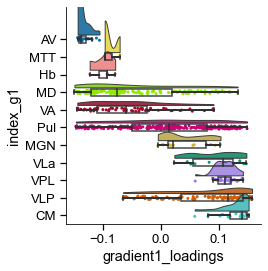

In [94]:
plt.rcParams['axes.linewidth'] = 0.8
fig, ax =plt.subplots(1,sharex=True, figsize=(3.5,4))
ax=pt.RainCloud(x="index_g1", y="gradient1_loadings", data=df,
                width_viol= 5, #5
                width_box= .4,
                scale="area",
                orient = "h",
                palette= sorted_colors,
                bw=0.4,
                move= 0,   #0.4
                alpha=0.9, #1
                box_showfliers=False,
                ax=ax)
ax.set_yticklabels(sorted_labels)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.savefig("/data/p_02666/Project1_thalamus/plots/figure1/thomas_raincloud_sorted_G1_left.svg", transparent=True, format='svg')



## Gradient 2

In [95]:
#rank according to median
#calculate mean per subnucleus
median_loadings=df.groupby("labels")["gradient2_loadings"].median()

#sort
sorted_labels=median_loadings.sort_values().index
sorted_labels  # -> create index based on this order

Index(['MGN', 'VPL', 'AV', 'Pul', 'CM', 'VLP', 'Hb', 'MD', 'MTT', 'VA', 'VLa'], dtype='object', name='labels')

In [96]:
#sort colors the same way as labels
sorted_colors=[label_to_color[label] for label in sorted_labels]
sorted_colors

['#D0B53B',
 '#9A76F3',
 '#0072B2',
 '#CD0074',
 '#33CCCC',
 '#D55E00',
 '#FF7373',
 '#8EEB00',
 '#FFED2D',
 '#A60628',
 '#009E73']

In [97]:
df.loc[df["labels"]=="MGN", "index_g2"]=0
df.loc[df["labels"]=="VPL", "index_g2"]=1
df.loc[df["labels"]=="AV", "index_g2"]=2
df.loc[df["labels"]=="Pul", "index_g2"]=3
df.loc[df["labels"]=="CM", "index_g2"]=4
df.loc[df["labels"]=="VLP", "index_g2"]=5
df.loc[df["labels"]=="Hb", "index_g2"]=6
df.loc[df["labels"]=="MD", "index_g2"]=7
df.loc[df["labels"]=="MTT", "index_g2"]=8
df.loc[df["labels"]=="VA", "index_g2"]=9
df.loc[df["labels"]=="VLa", "index_g2"]=10
df

,gradient1_loadings,gradient2_loadings,label_nr,labels,index_g1,index_g2
0,-0.122754,0.022808,13.0,Hb,2.0,6.0
1,-0.121973,0.057882,NaN,NaN,NaN,NaN
2,-0.123259,0.021347,NaN,NaN,NaN,NaN
3,-0.120697,0.055700,NaN,NaN,NaN,NaN
4,-0.128238,0.047583,12.0,MD,3.0,7.0
...,...,...,...,...,...,...
1063,-0.069266,-0.045157,8.0,Pul,5.0,3.0
1064,-0.057227,-0.047421,8.0,Pul,5.0,3.0
1065,-0.062120,-0.055406,NaN,NaN,NaN,NaN
1066,-0.038428,-0.063016,NaN,NaN,NaN,NaN


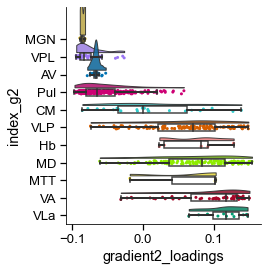

In [98]:
plt.rcParams['axes.linewidth'] = 0.8
fig, ax =plt.subplots(1,sharex=True, figsize=(3.5,4))
ax=pt.RainCloud(x="index_g2", y="gradient2_loadings", data=df,
                width_viol= 5,
                width_box= .4,
                scale="area",
                orient = "h",
                palette= sorted_colors,
                move= 0,
                alpha=0.9,
                bw=.4,
                #dodge=True,
                box_showfliers=False,
                ax=ax)
ax.set_yticklabels(sorted_labels)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.savefig("/data/p_02666/Project1_thalamus/plots/figure1/thomas_raincloud_sorted_G2_left.svg", transparent=True, format='svg', dpi=600)

